### Métricas de avaliação:

#### Matriz de Confusão 

Essa média as vezes pode ser enganosa. Nós podemos analisar a Matriz de Confusão _(Confusion Matrix)_ que nos mostra aonde o modelo errou. Falsos Positivos x Falso Negativos.

#### Interpretando a Matriz de Confusão
A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.


#### Base de dados: Breast Cancer

In [1]:
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# carrega a base de dados
from google.colab import files  
uploaded = files.upload() 
dados = pandas.read_csv('diabetes_prediction_dataset.csv')
dados

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
dados.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
dados['diabetes'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64>

In [3]:
le = LabelEncoder()
dados['diabetes'] = le.fit_transform(dados['diabetes'])
dados['gender'] = le.fit_transform(dados['gender'])
dados['smoking_history'] = le.fit_transform(dados['smoking_history'])

In [4]:
### Faz a sepatração entre treino e teste (70% e 30%)
X = dados.drop(['diabetes'], axis=1).values
y = dados['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [5]:
X_train

array([[  1.  ,  49.  ,   0.  , ...,  27.32,   5.  , 155.  ],
       [  1.  ,  64.  ,   0.  , ...,  27.32,   3.5 , 145.  ],
       [  0.  ,  24.  ,   0.  , ...,  27.32,   3.5 , 130.  ],
       ...,
       [  1.  ,  42.  ,   0.  , ...,  26.14,   5.8 ,  85.  ],
       [  0.  ,  37.  ,   0.  , ...,  24.96,   6.2 , 158.  ],
       [  0.  ,  23.  ,   0.  , ...,  27.99,   5.  , 159.  ]])

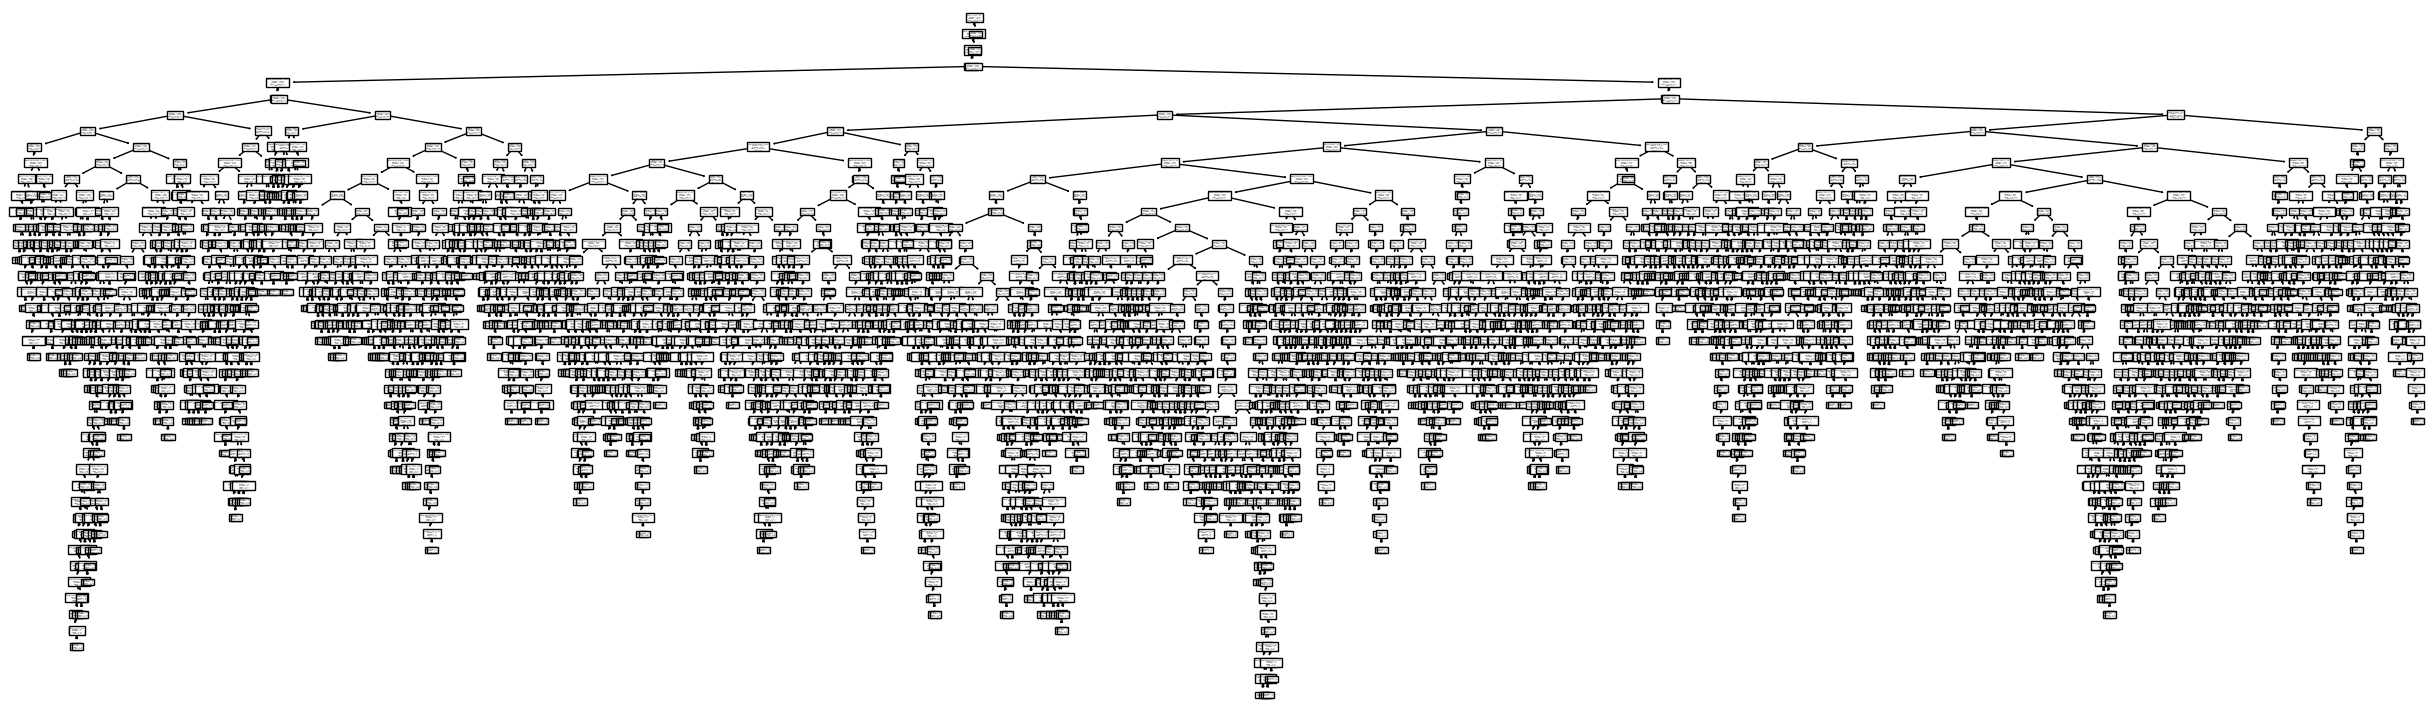

In [7]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

fig = plt.figure(figsize=(31,9))

tree.plot_tree(clf, 
                   feature_names=dados.columns.drop('diabetes'),  
                   class_names=['nao', 'sim'],
                   filled=False)

# tree.plot_tree(clf)

plt.show()                   


### Importando métricas do Sklearn

In [8]:
from sklearn.metrics import accuracy_score                            

### Acuracidade

In [9]:
accuracy_score(y_test,y_pred)

0.9544333333333334

### Matriz Confusão

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

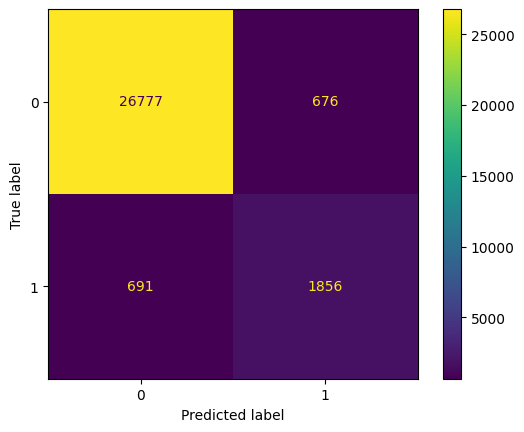

In [11]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### Exemplo com validação cruzada

- https://drigols.medium.com/introdu%C3%A7%C3%A3o-a-valida%C3%A7%C3%A3o-cruzada-k-fold-2a6bced32a90
- https://dataml.com.br/validacao-cruzada-aninhada-com-scikit-learn/


In [12]:
from sklearn.model_selection import StratifiedKFold
import statistics  as sts

In [13]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)    
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.9498571428571428, 0.9522857142857143, 0.953, 0.9514285714285714, 0.9544285714285714, 0.9541428571428572, 0.9504285714285714, 0.955, 0.9487142857142857, 0.9514285714285714]

Maior ACC: 95.5 %

Menor ACC: 94.87142857142857 %

Média ACC: 95.20714285714286 %

Desvio Padrão: 0.0020824828195876027


In [14]:
y_pred = clf.predict(X_test)

In [15]:
accuracy_score(y_test,y_pred)

0.9816

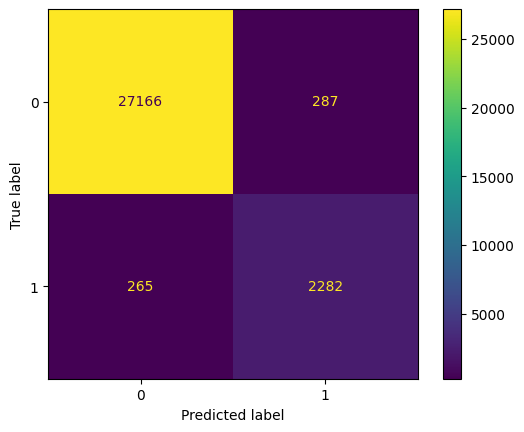

In [16]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## **Algoritmo KNN**

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9522333333333334

In [19]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    knn.fit(x_train_fold, y_train_fold)    
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.9512857142857143, 0.9508571428571428, 0.9541428571428572, 0.9437142857142857, 0.9524285714285714, 0.9551428571428572, 0.952, 0.954, 0.9521428571428572, 0.9502857142857143]

Maior ACC: 95.51428571428572 %

Menor ACC: 94.37142857142857 %

Média ACC: 95.16 %

Desvio Padrão: 0.0031707277933037755


In [20]:
y_pred = knn.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred)

0.9580333333333333

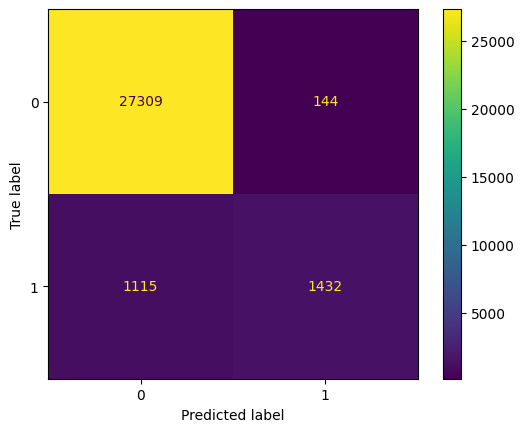

In [22]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## Normalizando os dados


In [24]:
## Sem normalização
X = dados.drop(['diabetes'], axis=1).values
y = dados['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, 
                            y, train_size=0.7, test_size=0.3, random_state=42)

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Algoritmo KNN

In [ ]:
## KNN

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9614666666666667

In [37]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    knn.fit(x_train_fold, y_train_fold)    
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.9512857142857143, 0.9508571428571428, 0.9541428571428572, 0.9437142857142857, 0.9524285714285714, 0.9551428571428572, 0.952, 0.954, 0.9521428571428572, 0.9502857142857143]

Maior ACC: 95.51428571428572 %

Menor ACC: 94.37142857142857 %

Média ACC: 95.16 %

Desvio Padrão: 0.0031707277933037755


In [38]:
y_pred = knn.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred)

0.9151

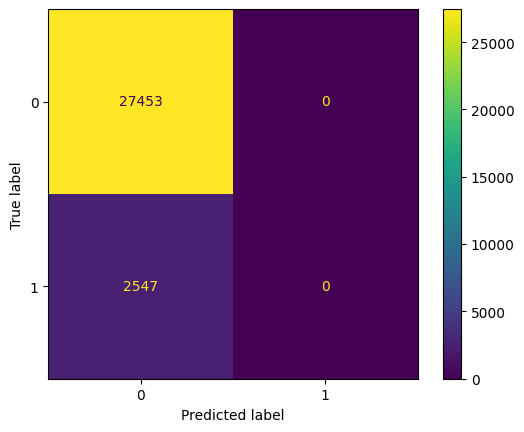

In [41]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#### Algoritmo Árvore de Decisão

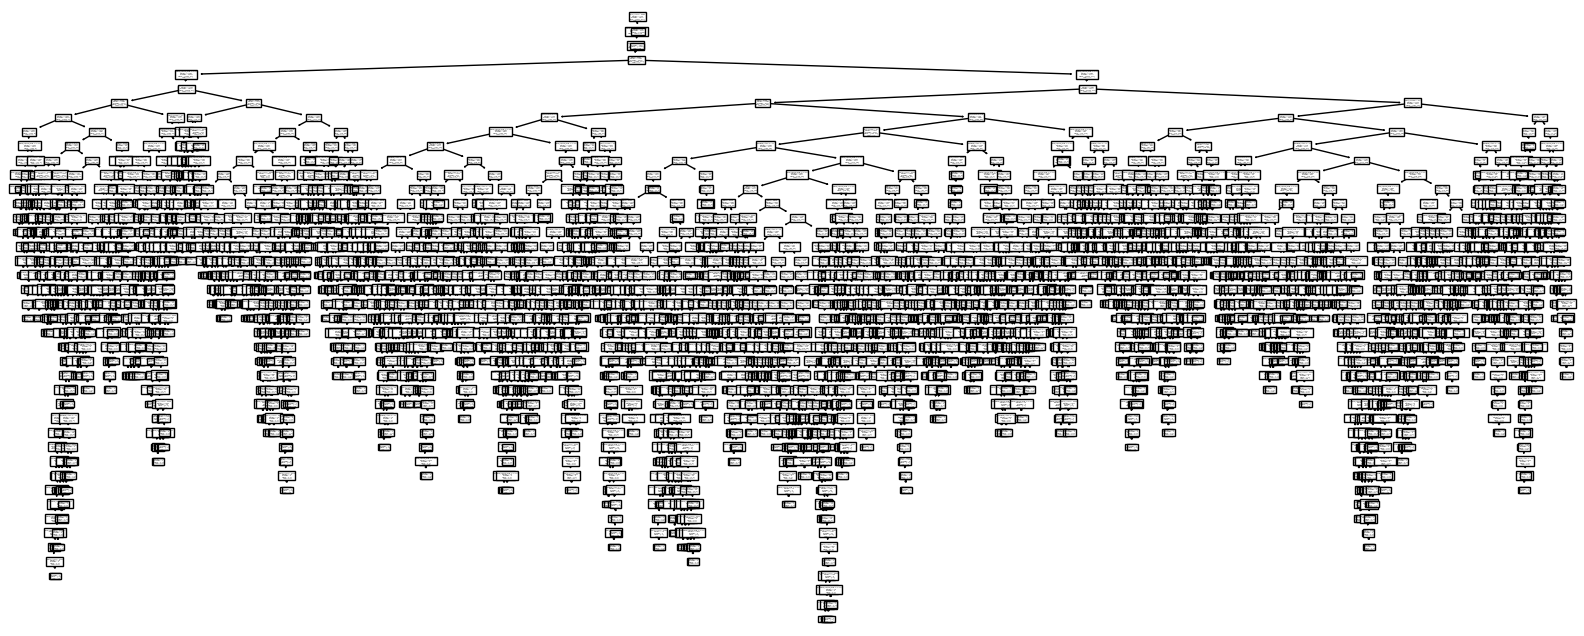

In [42]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

fig = plt.figure(figsize=(20,8))

tree.plot_tree(clf, 
                   feature_names=dados.columns.drop('diabetes'),  
                   class_names=['nao', 'sim'],
                   filled=False)

# tree.plot_tree(clf)

plt.show()                   

In [43]:
accuracy_score(y_test,y_pred)

0.9542

In [44]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)    
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.951, 0.9537142857142857, 0.9538571428571428, 0.9502857142857143, 0.9548571428571428, 0.9561428571428572, 0.9521428571428572, 0.9554285714285714, 0.9491428571428572, 0.9518571428571428]

Maior ACC: 95.61428571428571 %

Menor ACC: 94.91428571428571 %

Média ACC: 95.28428571428572 %

Desvio Padrão: 0.0023215934007416858


In [45]:
y_pred = clf.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred)

0.9151

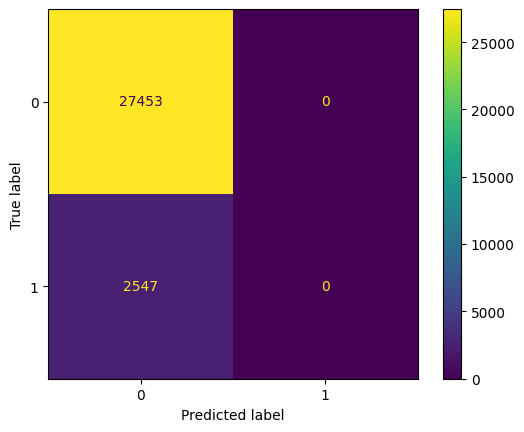

In [47]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### Algoritmo Randon Forest

In [48]:
forest = RandomForestClassifier(n_estimators = 50, random_state=10)

In [49]:
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
accuracy_score(y_test,y_pred)

0.9703

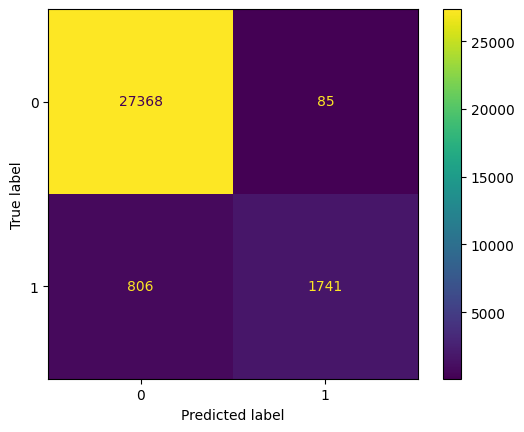

In [55]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [53]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
lst_accu_stratified = []

for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    knn.fit(x_train_fold, y_train_fold)    
    lst_accu_stratified.append(forest.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.08742857142857142, 0.084, 0.08014285714285714, 0.085, 0.09257142857142857, 0.09228571428571429, 0.08814285714285715, 0.087, 0.08185714285714285, 0.08157142857142857]

Maior ACC: 9.257142857142856 %

Menor ACC: 8.014285714285714 %

Média ACC: 8.6 %

Desvio Padrão: 0.004299976269512118


In [54]:
## Validação cruzada conjunto
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X_test, y_test):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    knn.fit(x_train_fold, y_train_fold)    
    lst_accu_stratified.append(forest.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.083, 0.075, 0.09733333333333333, 0.089, 0.085, 0.09066666666666667, 0.08533333333333333, 0.08566666666666667, 0.08366666666666667, 0.09233333333333334]

Maior ACC: 9.733333333333333 %

Menor ACC: 7.5 %

Média ACC: 8.67 %

Desvio Padrão: 0.006068436860174613
